In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import kfold
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

## **Import data climate yang telah dijoin dengan data hasil panen sayur**

In [ ]:
data_input = pd.read_csv("/content/drive/MyDrive/project_metrodata/kumpulan_file/start_over/climate_sayur_joined3.csv")

In [ ]:
data_input.head()

,province_name,tahun,nama_komoditas,hasil_panen,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
0,aceh,2010,Bawang Merah (Ton),3615.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276
1,aceh,2010,Bawang Putih (Ton),161.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276
2,aceh,2010,Bawang Daun (Ton),2736.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276
3,aceh,2010,Kentang (Ton),8587.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276
4,aceh,2010,Kubis (Ton),4466.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276


In [ ]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9350 entries, 0 to 9349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_name   9350 non-null   object 
 1   tahun           9350 non-null   int64  
 2   nama_komoditas  9350 non-null   object 
 3   hasil_panen     9350 non-null   float64
 4   Tn              9350 non-null   float64
 5   Tx              9350 non-null   float64
 6   Tavg            9350 non-null   float64
 7   RH_avg          9350 non-null   float64
 8   RR              9350 non-null   float64
 9   ss              9350 non-null   float64
 10  ff_x            9350 non-null   float64
 11  ddd_x           9350 non-null   float64
 12  ff_avg          9350 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 949.7+ KB


In [ ]:
data_input.nama_komoditas.value_counts()

Bawang Merah (Ton)      374
Tomat (Ton)             374
Jengkol (Ton)           374
Petai (Ton)             374
Paprika (Ton)           374
Melinjo (Ton)           374
Bayam (Ton)             374
Kangkung (Ton)          374
Labu Siam (Ton)         374
Ketimun (Ton)           374
Buncis (Ton)            374
Terung (Ton)            374
Cabai Rawit (Ton)       374
Bawang Putih (Ton)      374
Cabai Besar (Ton)       374
Kacang Panjang (Ton)    374
Kacang Merah (Ton)      374
Lobak (Ton)             374
Wortel (Ton)            374
Petsai/Sawi (Ton)       374
Kembang Kol (Ton)       374
Kubis (Ton)             374
Kentang (Ton)           374
Bawang Daun (Ton)       374
Jamur (Ton)             374
Name: nama_komoditas, dtype: int64

#### **Analisa tingkat signifkansi tiap-tiap variable**

<ipython-input-85-0625028477a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_group_1 = data_input.corr()


<Axes: >

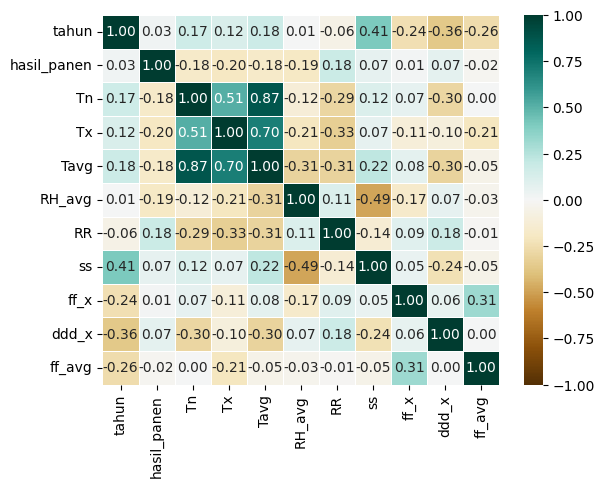

In [ ]:
corr_group_1 = data_input.corr()
sns.heatmap(corr_group_1, annot = True, cmap="BrBG", fmt = ".2f", linewidths=.5, vmin=-1, vmax=1)

In [ ]:
# dari table diatas, dapat diketahui bahwa ternyata masing-masing variable memiliki tingkat signifkansi yang tidak terlalu tinggi terhadap hasil panen, dimana nilainya tidak ada yang diatas 0.5
# oleh karena itu, dapat dipertimbangkan untuk mencari variable lain, yang mungkin memiliki pengaruh signifikan terhadap jumlah hasil panen
# kemudian kami berasumsi bahwa ada faktor-faktor lain yang mungkin memiliki pengaruh besar, adalah luas wilayah pertanian dan jumlah tenaga kerja sektor pertanian di tiap-tiap provinsi

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Membuat model ANOVA
model = ols('hasil_panen ~ province_name + tahun + nama_komoditas', data=data_input).fit()

# Melakukan analisis varian dua arah
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
# uji anova dua arah ini ditujukan untuk melihat apakah variabel-variabel kategorikal seperti "province_name", "tahun", dan "nama_komoditas"
# memiliki pengaruh signifikan terhadap jumlah hasil panen
# parameter yang umum dijadikan acuan adalah PR(>F) atau disebut juga p-value (0.05 atau 0.01)
# berdasarkan parameter tersebut, dapat diketahui bahwa semua variabel kategorikal memiliki pengaruh yang signifikan terhadap jumlah hasil panen tiap tahun


                      sum_sq      df           F         PR(>F)
province_name   6.090590e+12    33.0  181.098096   0.000000e+00
nama_komoditas  1.434185e+12    24.0   58.635730  3.305669e-262
tahun           1.144380e+10     1.0   11.228942   8.085260e-04
Residual        9.468779e+12  9291.0         NaN            NaN


### **Input data luas wilayah pertanian dan tenaga kerja sektor pertanian**

In [ ]:
data_luas_pertanian = pd.read_excel("/content/drive/MyDrive/project_metrodata/kumpulan_file/start_over/luas_wilayah_melted.xlsx")

In [ ]:
data_tnk_pertanian = pd.read_excel("/content/drive/MyDrive/project_metrodata/kumpulan_file/start_over/data_tnk_pertanian.xlsx")

In [ ]:
data_luas_pertanian.head()

,province_name,tahun,luar_wilayah_hektar
0,aceh,2004,346305.0
1,sumatera utara,2004,502839.0
2,sumatera barat,2004,231939.0
3,riau,2004,125966.0
4,jambi,2004,122126.0


In [ ]:
data_luas_pertanian.shape

(408, 3)

In [ ]:
data_luas_pertanian.tahun.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [ ]:
data_tnk_pertanian.head()

,province_name,tahun,prosentase_tnk
0,aceh,2015,85.11
1,sumatera utara,2015,82.10
2,sumatera barat,2015,86.02
3,riau,2015,65.61
4,jambi,2015,74.00


In [ ]:
data_tnk_pertanian.shape

(272, 3)

In [ ]:
data_tnk_pertanian.tahun.unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
# data luas lahan pertanian dimulai dari tahun 2004 hingga tahun 2015
# data prosentase tenaga kerja sektor pertanian, dimulai dari tahun 2015 hingga tahun 2022
# data daily climate yang telah di join dengan data jumlah hasil panen memiliki rentang tahun yang luas
# namun, jika kita menerapkan inner join pada semua data, maka kita hanya akan mendapatkan data di tahun 2015 saja, dan kehilangan sebagian besar data
# maka dari itu, solusinya adalah dengan memilih:
            # climate_sayur + luas_wilayah_pertanian
            # atau
            # climate_sayur + prosentase_tnk_pertanian


## **join climate, hasil panen dan luas wilayah**

In [ ]:
join_1 = pd.merge(data_input, data_luas_pertanian, on = ["province_name", "tahun"], how = "inner")

In [ ]:
join_1.head()

,province_name,tahun,nama_komoditas,hasil_panen,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,luar_wilayah_hektar
0,aceh,2010,Bawang Merah (Ton),3615.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
1,aceh,2010,Bawang Putih (Ton),161.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
2,aceh,2010,Bawang Daun (Ton),2736.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
3,aceh,2010,Kentang (Ton),8587.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
4,aceh,2010,Kubis (Ton),4466.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0


In [ ]:
join_1.columns.tolist()[3:]

['hasil_panen',
 'Tn',
 'Tx',
 'Tavg',
 'RH_avg',
 'RR',
 'ss',
 'ff_x',
 'ddd_x',
 'ff_avg',
 'luar_wilayah_hektar']

In [ ]:
bawang = join_1[join_1.nama_komoditas.str.contains(r"Bawang\sMerah")].groupby(["province_name", "tahun"]).agg({f"{i}":"mean" for i in join_1.columns.tolist()[3:]}).reset_index().copy()

In [ ]:
bawang.head()

,province_name,tahun,hasil_panen,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,luar_wilayah_hektar
0,aceh,2010,3615.0,21.927876,31.041141,26.119118,84.095730,15.200939,3.184520,5.175263,195.720373,2.722760,313649.0
1,aceh,2011,2600.0,21.513379,30.800959,25.824338,84.578122,14.557593,3.322084,5.004236,195.565730,2.772310,307556.0
2,aceh,2012,4387.0,22.075919,31.726088,26.738555,84.405678,14.439666,3.185674,5.584356,193.848669,2.715960,308973.0
3,aceh,2013,3711.0,21.716258,30.952623,25.968164,84.293230,14.063000,3.995801,5.145112,200.306276,2.583148,300808.0
4,aceh,2014,6707.0,22.094109,31.023092,25.891110,82.897616,15.225356,4.171125,5.290050,188.651790,2.377869,294129.0


In [ ]:
join_1.columns

Index(['province_name', 'tahun', 'nama_komoditas', 'hasil_panen', 'Tn', 'Tx',
       'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg',
       'luar_wilayah_hektar'],
      dtype='object')

In [ ]:
matric_join_1 = join_1.corr()

<ipython-input-23-1c5cde174d08>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matric_join_1 = join_1.corr()


<Axes: >

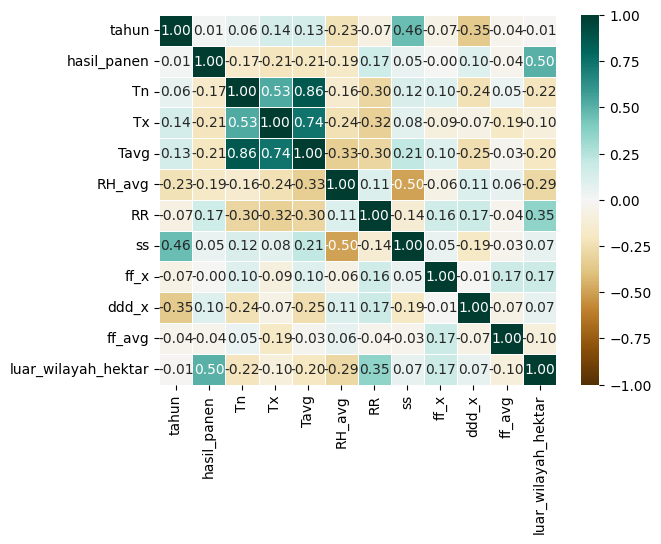

In [ ]:
sns.heatmap(matric_join_1, annot = True, cmap="BrBG", fmt = ".2f", linewidths=.5, vmin=-1, vmax=1)

In [ ]:
# heatmap diatas menunjukan korelase antar variable, dan dari situ dapat dilihat bahwa korelasi antara luas_wilayah dengan hasil panen bernilai 0.5,
# dimana itu adalah korelasi terbaik sejauh ini

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Membuat model ANOVA
model = ols('hasil_panen ~ province_name + tahun + nama_komoditas', data=join_1).fit()

# Melakukan analisis varian dua arah
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                      sum_sq      df           F         PR(>F)
province_name   3.068540e+12    33.0  110.560207   0.000000e+00
nama_komoditas  6.565952e+11    24.0   32.528757  4.243893e-138
tahun           8.573943e+08     1.0    1.019440   3.127004e-01
Residual        4.239705e+12  5041.0         NaN            NaN


In [ ]:
# PR(>F) atau P-value yang kecil menunjukkan adanya hubungan yang signifikan antara variabel kategorikal dengan variabel kontinu. patokan yang umum digunakan adalah 0.05
# dari data diatas, province_name memiliki p_value yang nol, nama_komoditas : 4.24 e-138 (hampir-hampir nol) dan tahun: 0.3127004 (lebih besar dari 0.05)

In [ ]:
join_1.isna().sum()

province_name           0
tahun                   0
nama_komoditas          0
hasil_panen             0
Tn                      0
Tx                      0
Tavg                    0
RH_avg                  0
RR                      0
ss                      0
ff_x                    0
ddd_x                   0
ff_avg                  0
luar_wilayah_hektar    75
dtype: int64

In [ ]:
# ada missing_values pada data luas_wilayah_hektar

In [ ]:
for i in join_1.columns.tolist()[3:]:
  grouped_wilayah = join_1.groupby(["province_name"])[i].transform("mean")
  join_1[i].fillna(grouped_wilayah, inplace=True)

  # dengan code ini, kita mengimputasi missing_values, dengan menggunakan "mean", berdasarkan masing-masing provinsi

In [ ]:
join_1.isna().sum()

province_name          0
tahun                  0
nama_komoditas         0
hasil_panen            0
Tn                     0
Tx                     0
Tavg                   0
RH_avg                 0
RR                     0
ss                     0
ff_x                   0
ddd_x                  0
ff_avg                 0
luar_wilayah_hektar    0
dtype: int64

## **join climate, hasil panan dan jumlah tenaga kerja**

In [ ]:
join_2 = pd.merge(data_input, data_tnk_pertanian, on = ['province_name', 'tahun'], how = "inner")

In [ ]:
bawang_2 = join_2[join_2.nama_komoditas.str.contains(r"Bawang\sMerah")].groupby(["province_name", "tahun"]).agg({f"{i}":"mean" for i in join_2.columns.tolist()[3:]}).reset_index()

<ipython-input-34-42979a04329f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bawang_2_corr_matric = bawang_2.corr()


<Axes: >

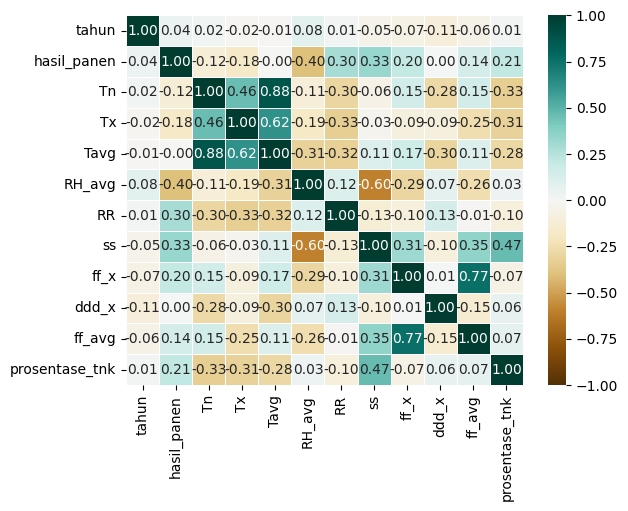

In [ ]:
bawang_2_corr_matric = bawang_2.corr()
sns.heatmap(bawang_2_corr_matric,annot = True, cmap="BrBG", fmt = ".2f", linewidths=.5, vmin=-1, vmax=1)

In [ ]:
# pada grafik heatmap diatas, terlihat bahwa variabel prosentase_tnk, tidak terlalu berkorelasi dengan hasil panen
# nilai korelase terbaik berada pada hubungan hasil_panen dengan RH_avg, yaitu -0.4 , namun kombinasi climate_sayur + luas_wilayah_pertanian,
# masih relatif lebih baik. maka dari itu, data yang akan dijadikan sebagai data latih adalah climate_sayur + luas_wilayah

In [ ]:
bawang_2.tahun = bawang_2.tahun.astype(object)

In [ ]:
bawang_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_name   204 non-null    object 
 1   tahun           204 non-null    object 
 2   hasil_panen     204 non-null    float64
 3   Tn              204 non-null    float64
 4   Tx              204 non-null    float64
 5   Tavg            204 non-null    float64
 6   RH_avg          204 non-null    float64
 7   RR              204 non-null    float64
 8   ss              204 non-null    float64
 9   ff_x            204 non-null    float64
 10  ddd_x           204 non-null    float64
 11  ff_avg          204 non-null    float64
 12  prosentase_tnk  204 non-null    float64
dtypes: float64(11), object(2)
memory usage: 20.8+ KB


## **feature engineering**

In [ ]:
features_1 = join_1.copy()

In [ ]:
features_1.head()

,province_name,tahun,nama_komoditas,hasil_panen,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,luar_wilayah_hektar
0,aceh,2010,Bawang Merah (Ton),3615.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
1,aceh,2010,Bawang Putih (Ton),161.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
2,aceh,2010,Bawang Daun (Ton),2736.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
3,aceh,2010,Kentang (Ton),8587.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
4,aceh,2010,Kubis (Ton),4466.0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0


In [ ]:
features_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5100 entries, 0 to 5099
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   province_name        5100 non-null   object 
 1   tahun                5100 non-null   int64  
 2   nama_komoditas       5100 non-null   object 
 3   hasil_panen          5100 non-null   float64
 4   Tn                   5100 non-null   float64
 5   Tx                   5100 non-null   float64
 6   Tavg                 5100 non-null   float64
 7   RH_avg               5100 non-null   float64
 8   RR                   5100 non-null   float64
 9   ss                   5100 non-null   float64
 10  ff_x                 5100 non-null   float64
 11  ddd_x                5100 non-null   float64
 12  ff_avg               5100 non-null   float64
 13  luar_wilayah_hektar  5100 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 597.7+ KB


In [ ]:
poped = features_1.pop("hasil_panen")
features_1.insert(13, "hasil_panen", poped )

In [ ]:
features_1.columns

Index(['province_name', 'tahun', 'nama_komoditas', 'Tn', 'Tx', 'Tavg',
       'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'luar_wilayah_hektar',
       'hasil_panen'],
      dtype='object')

In [ ]:
features_1.tahun = features_1.tahun.astype(object)

In [ ]:
x = features_1.iloc[:,:-1]
y = features_1.iloc[:,-1]

In [ ]:
x.head()

,province_name,tahun,nama_komoditas,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,luar_wilayah_hektar
0,aceh,2010,Bawang Merah (Ton),21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
1,aceh,2010,Bawang Putih (Ton),21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
2,aceh,2010,Bawang Daun (Ton),21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
3,aceh,2010,Kentang (Ton),21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0
4,aceh,2010,Kubis (Ton),21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5100 entries, 0 to 5099
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   province_name        5100 non-null   object 
 1   tahun                5100 non-null   object 
 2   nama_komoditas       5100 non-null   object 
 3   Tn                   5100 non-null   float64
 4   Tx                   5100 non-null   float64
 5   Tavg                 5100 non-null   float64
 6   RH_avg               5100 non-null   float64
 7   RR                   5100 non-null   float64
 8   ss                   5100 non-null   float64
 9   ff_x                 5100 non-null   float64
 10  ddd_x                5100 non-null   float64
 11  ff_avg               5100 non-null   float64
 12  luar_wilayah_hektar  5100 non-null   float64
dtypes: float64(10), object(3)
memory usage: 557.8+ KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 5100 entries, 0 to 5099
Series name: hasil_panen
Non-Null Count  Dtype  
--------------  -----  
5100 non-null   float64
dtypes: float64(1)
memory usage: 79.7 KB


In [ ]:
x = pd.get_dummies(x) # melakukan one hot encoding pada data-data categorical

<ipython-input-48-9e5de79f8670>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x = pd.get_dummies(x) # melakukan one hot encoding pada data-data categorical


In [ ]:
x.head()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,luar_wilayah_hektar,...,nama_komoditas_Kubis (Ton),nama_komoditas_Labu Siam (Ton),nama_komoditas_Lobak (Ton),nama_komoditas_Melinjo (Ton),nama_komoditas_Paprika (Ton),nama_komoditas_Petai (Ton),nama_komoditas_Petsai/Sawi (Ton),nama_komoditas_Terung (Ton),nama_komoditas_Tomat (Ton),nama_komoditas_Wortel (Ton)
0,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0,...,0,0,0,0,0,0,0,0,0,0
1,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0,...,0,0,0,0,0,0,0,0,0,0
2,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0,...,0,0,0,0,0,0,0,0,0,0
3,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0,...,0,0,0,0,0,0,0,0,0,0
4,21.927876,31.041141,26.119118,84.09573,15.200939,3.18452,5.175263,195.720373,2.72276,313649.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# scalling dengan menggunakan metode z-score

In [ ]:
x

array([[-1.45928007, -0.70291604, -0.92843804, ..., -0.20412415,
        -0.20412415, -0.20412415],
       [-1.45928007, -0.70291604, -0.92843804, ..., -0.20412415,
        -0.20412415, -0.20412415],
       [-1.45928007, -0.70291604, -0.92843804, ..., -0.20412415,
        -0.20412415, -0.20412415],
       ...,
       [-0.69158984, -1.26217855, -0.92035868, ..., -0.20412415,
        -0.20412415, -0.20412415],
       [-0.69158984, -1.26217855, -0.92035868, ..., -0.20412415,
        -0.20412415, -0.20412415],
       [-0.69158984, -1.26217855, -0.92035868, ..., -0.20412415,
        -0.20412415, -0.20412415]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# x_test dan y_test akan digunakan untuk menguji prediksi yang dibuat oleh model

In [ ]:
x_train.shape

(4080, 75)

In [ ]:
x_test.shape

(1020, 75)

In [ ]:
y_train.shape

(4080,)

In [ ]:
y_test.shape

(1020,)

## melatih model sebelum dilakukan hyperparameter tunning

In [ ]:
import math
def calculate_rmse(mse):
  rsme = math.sqrt(mse)
  return rsme
  #function untuk menghitung RMSE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
cv_scores = cross_val_score(estimator = model, X = x_train, y = y_train, cv=10, scoring='neg_mean_squared_error')
# menguji akurasi dan tingkat error pada model, sebelum dilakukan hyperparameter tunning

In [ ]:
mae = -cv_scores
mean_mae = np.mean(mae)
mean_mae
# ini adalah nilai MSE nya

77662953.63139576

In [ ]:
print("RMSE : ",round(calculate_rmse(mean_mae), 2))

RMSE :  8812.66


In [ ]:
mae_score = cv_scores*-1

In [ ]:
r_squared_scores = 1 - (mae_score / np.var(y))
r_squared_scores # ini adalah nilai R2 untuk masing-masing validation fold

array([0.94059198, 0.95455739, 0.9341192 , 0.98096533, 0.94580066,
       0.95088272, 0.95251092, 0.91920715, 0.96495777, 0.95917352])

In [ ]:
mean_r_squared = np.mean(r_squared_scores)
print(mean_r_squared) # ini adalah rata-rata R2

0.9502766650131591


## menggunakan gridsearch dan cross validation untuk hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV


regressor = RandomForestRegressor()
parameters = [{"n_estimators": [100, 150, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'max_features': ['auto', 'sqrt', 'log2']}]
# code diatas adalah combinasi parameter randomforestregressor yang ingin diujikan
grid = GridSearchCV(
    estimator = regressor,
    param_grid = parameters,
    cv = 10
)
grid.fit(x_train, y_train)
best_accuracy = grid.best_score_
best_parameter = grid.best_params_

In [ ]:
best_accuracy # ini adalah akurasi (R2) yang dihasilkan dari combinasi parameter terbaik

0.9481164932754919

In [ ]:
best_parameter # ini adalah parameter yang perlu kita input pada model randomforestregressor untuk mendapatkan hasil paling optimal

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

## melatih model setelah dilakukan hyperparameter tunning dan diketahui kombinasi parameter terbaik

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100,max_depth = None, max_features="auto", min_samples_split = 2)
cv_scores = cross_val_score(estimator = model,
                            X = x_train,
                            y = y_train,
                            cv=10,
                            scoring='neg_mean_squared_error')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

In [ ]:
mae_scores = cv_scores*-1

In [ ]:
print("Error: {:.2f} ".format(-1*mae_scores.mean()*100))

Error: -7573340107.60 


In [ ]:
r_squared_scores = 1 - (mae_scores / np.var(y))

In [ ]:
r_squared_scores

array([0.93610469, 0.9549956 , 0.94299988, 0.98161098, 0.94923151,
       0.94838377, 0.94792956, 0.9265674 , 0.96702191, 0.96027522])

In [ ]:
mean_r_squared = np.mean(r_squared_scores)
print(mean_r_squared) #  hasilnya bagus, namun ada indikasi bahwa modelnya mengalami overfitting

0.9515120518173255


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model.fit(x_train, y_train)
pred = model.predict(x_test)
print("MSE : ", mean_squared_error(y_test, pred))
print("R2 : ", r2_score(y_test, pred))

# memprediksi data baru (x_test, y_test) yang sudah dipisahkan dari data latih
# dan hasilnya sudah baik

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE :  74997746.40298025
R2 :  0.9552420018274768


In [ ]:
print("RMSE : ", round(calculate_rmse(mean_squared_error(y_test, pred)), 2))

RMSE :  8660.12
